# Titanic Assignment

Tackle the titanic dataset. A great place to start is on Kaggle: https://www.kaggle.com/c/titanic


In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [74]:
# Reading in our data
train_data = pd.read_csv("P2_Titanic_Data/train.csv")
test_data = pd.read_csv("P2_Titanic_Data/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

1. What the data means
Data Dictionary

Variable	Definition	                                    Key
survival	Survival	                                    0 = No, 1 = Yes
pclass	    Ticket class	                                1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	                            C = Cherbourg, Q = Queenstown, S = Southampton


2. Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them


3. This section to analyse our data and find relations using plots and other analysis tools.


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
print(f"Percentage of Survivors: {342 / 891 * 100}")

Percentage of Survivors: 38.38383838383838


In [10]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
p_class_survived = train_data.groupby('Pclass')['Survived'].value_counts()
p_class_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass,Survived'>

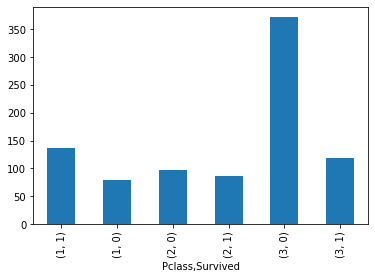

In [12]:
p_class_survived.plot.bar()

In [13]:
print(f"First Class Survival Rate: {(136 / (136 + 80)) * 100}")
print(f"Second Class Survival Rate: {(87 / (87+97)) * 100}")
print(f"Third Class Survival Rate: {(119 / (119 + 372)) * 100}")

First Class Survival Rate: 62.96296296296296
Second Class Survival Rate: 47.28260869565217
Third Class Survival Rate: 24.236252545824847


As observed the survival rates for the first and second class is much higher than for the third class where only 1 in every five third class passengers survived.

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
sex_surv = train_data.groupby('Sex')['Survived'].value_counts()
sex_surv

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [17]:
sex_class_surv = train_data.groupby(['Sex', 'Pclass'])['Survived'].value_counts()
sex_class_surv

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [18]:
print(f"Woman 1st Class Survival Rate: {(91 / (91 + 3)) * 100}")
print(f"Woman 2nd Class Survival Rate: {(70 / (70 + 6)) * 100}")
print(f"Woman 3rd Class Survival Rate: {(72 / (72 + 72)) * 100}")
print(f"Man 1st Class Survival Rate: {(45 / (45 + 77)) * 100}")
print(f"Man 2nd Class Survival Rate: {(17 / (17 + 91)) * 100}")
print(f"Man 3rd Class Survival Rate: {(47 / (47 + 300)) * 100}")

Woman 1st Class Survival Rate: 96.80851063829788
Woman 2nd Class Survival Rate: 92.10526315789474
Woman 3rd Class Survival Rate: 50.0
Man 1st Class Survival Rate: 36.885245901639344
Man 2nd Class Survival Rate: 15.74074074074074
Man 3rd Class Survival Rate: 13.544668587896252


<AxesSubplot:xlabel='Sex,Pclass,Survived'>

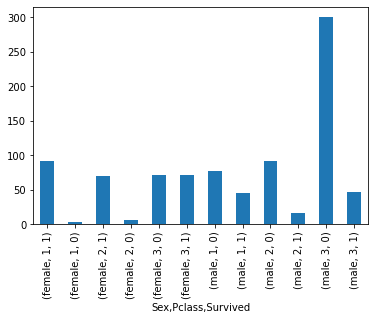

In [19]:
sex_class_surv.plot.bar()

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train_data['Child'] = train_data['Age'].apply(lambda x: x < 13)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [22]:
sex_age_class_surv = train_data.groupby(['Sex', 'Pclass', 'Child'])['Survived'].value_counts()
sex_age_class_surv

Sex     Pclass  Child  Survived
female  1       False  1            91
                       0             2
                True   0             1
        2       False  1            62
                       0             6
                True   1             8
        3       False  1            61
                       0            60
                True   0            12
                       1            11
male    1       False  0            77
                       1            42
                True   1             3
        2       False  0            91
                       1             8
                True   1             9
        3       False  0           284
                       1            38
                True   0            16
                       1             9
Name: Survived, dtype: int64

Only in third class did children die, in the other classes all the children survived.

<AxesSubplot:xlabel='Sex,Pclass,Child,Survived'>

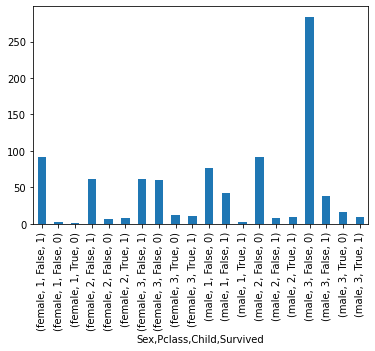

In [23]:
sex_age_class_surv.plot.bar()

In [24]:
train_data.groupby('Pclass')['Fare'].mean(), train_data.groupby('Pclass')['Fare'].max()

(Pclass
 1    84.154687
 2    20.662183
 3    13.675550
 Name: Fare, dtype: float64,
 Pclass
 1    512.3292
 2     73.5000
 3     69.5500
 Name: Fare, dtype: float64)

In [25]:
train_data['Gender'] = train_data['Sex'].apply(lambda x: 0 if x == 'female' else 1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,1


## Splitting our data into train and test set

We will also choose what features to use

In [26]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Child        891 non-null    bool   
 13  Gender       891 non-null    int64  
dtypes: bool(1), float64(2), int64(6), object(5)
memory usage: 91.5+ KB


In [28]:
train_data_new = train_data.drop(['Name', 'Gender', 'Ticket', 'Embarked', 'PassengerId', 'Cabin'], axis=1)
test_data_new = test_data.drop(['Name', 'Ticket', 'Embarked', 'PassengerId', 'Cabin'], axis=1)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_new['ScaledFare'] = scaler.fit_transform(train_data_new['Fare'].values.reshape(-1,1))
train_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,ScaledFare
0,0,3,male,22.0,1,0,7.2500,False,-0.502445
1,1,1,female,38.0,1,0,71.2833,False,0.786845
2,1,3,female,26.0,0,0,7.9250,False,-0.488854
3,1,1,female,35.0,1,0,53.1000,False,0.420730
4,0,3,male,35.0,0,0,8.0500,False,-0.486337


In [30]:
test_data_new['ScaledFare'] = scaler.transform(test_data_new['Fare'].values.reshape(-1,1))

In [31]:
train_data_new['Child'] = train_data_new['Child'].apply(lambda x: 1 if x else 0)
train_data_new.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,ScaledFare
0,0,3,male,22.0,1,0,7.2500,0,-0.502445
1,1,1,female,38.0,1,0,71.2833,0,0.786845
2,1,3,female,26.0,0,0,7.9250,0,-0.488854
3,1,1,female,35.0,1,0,53.1000,0,0.420730
4,0,3,male,35.0,0,0,8.0500,0,-0.486337


In [32]:
test_data_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,ScaledFare
0,3,male,34.5,0,0,7.8292,-0.490783
1,3,female,47.0,1,0,7.0000,-0.507479
2,2,male,62.0,0,0,9.6875,-0.453367
3,3,male,27.0,0,0,8.6625,-0.474005
4,3,female,22.0,1,1,12.2875,-0.401017


In [33]:
test_data_new['Child'] = test_data['Age'] < 13
test_data_new['Child'] = test_data_new['Child'].apply(lambda x: 1 if x else 0)
test_data_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,ScaledFare,Child
0,3,male,34.5,0,0,7.8292,-0.490783,0
1,3,female,47.0,1,0,7.0000,-0.507479,0
2,2,male,62.0,0,0,9.6875,-0.453367,0
3,3,male,27.0,0,0,8.6625,-0.474005,0
4,3,female,22.0,1,1,12.2875,-0.401017,0


In [34]:
train_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,ScaledFare
0,0,3,male,22.0,1,0,7.2500,0,-0.502445
1,1,1,female,38.0,1,0,71.2833,0,0.786845
2,1,3,female,26.0,0,0,7.9250,0,-0.488854
3,1,1,female,35.0,1,0,53.1000,0,0.420730
4,0,3,male,35.0,0,0,8.0500,0,-0.486337


In [35]:
# Create dummies

train_data_new_ohe = pd.get_dummies(train_data_new, columns=['Sex'])
train_data_new_ohe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Child,ScaledFare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,-0.502445,0,1
1,1,1,38.0,1,0,71.2833,0,0.786845,1,0
2,1,3,26.0,0,0,7.9250,0,-0.488854,1,0
3,1,1,35.0,1,0,53.1000,0,0.420730,1,0
4,0,3,35.0,0,0,8.0500,0,-0.486337,0,1


In [36]:
test_data_new_ohe = pd.get_dummies(test_data_new, columns=['Sex'])
test_data_new_ohe.head()

,Pclass,Age,SibSp,Parch,Fare,ScaledFare,Child,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,-0.490783,0,0,1
1,3,47.0,1,0,7.0000,-0.507479,0,1,0
2,2,62.0,0,0,9.6875,-0.453367,0,0,1
3,3,27.0,0,0,8.6625,-0.474005,0,0,1
4,3,22.0,1,1,12.2875,-0.401017,0,1,0


In [37]:
train_data_new_ohe['ScaledAge'] = scaler.fit_transform(train_data_new_ohe['Age'].values.reshape(-1, 1))
train_data_new_ohe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Child,ScaledFare,Sex_female,Sex_male,ScaledAge
0,0,3,22.0,1,0,7.2500,0,-0.502445,0,1,-0.592481
1,1,1,38.0,1,0,71.2833,0,0.786845,1,0,0.638789
2,1,3,26.0,0,0,7.9250,0,-0.488854,1,0,-0.284663
3,1,1,35.0,1,0,53.1000,0,0.420730,1,0,0.407926
4,0,3,35.0,0,0,8.0500,0,-0.486337,0,1,0.407926


In [38]:
test_data_new_ohe['ScaledAge'] = scaler.transform(test_data_new_ohe['Age'].values.reshape(-1, 1))
test_data_new_ohe.head()

,Pclass,Age,SibSp,Parch,Fare,ScaledFare,Child,Sex_female,Sex_male,ScaledAge
0,3,34.5,0,0,7.8292,-0.490783,0,0,1,0.369449
1,3,47.0,1,0,7.0000,-0.507479,0,1,0,1.331378
2,2,62.0,0,0,9.6875,-0.453367,0,0,1,2.485693
3,3,27.0,0,0,8.6625,-0.474005,0,0,1,-0.207709
4,3,22.0,1,1,12.2875,-0.401017,0,1,0,-0.592481


In [39]:
final_train_data = train_data_new_ohe.drop(['Survived', 'Age', 'Fare'], axis=1)
final_test_data = test_data_new_ohe.drop(['Age', 'Fare'], axis=1)

In [40]:
final_train_data.head()

,Pclass,SibSp,Parch,Child,ScaledFare,Sex_female,Sex_male,ScaledAge
0,3,1,0,0,-0.502445,0,1,-0.592481
1,1,1,0,0,0.786845,1,0,0.638789
2,3,0,0,0,-0.488854,1,0,-0.284663
3,1,1,0,0,0.420730,1,0,0.407926
4,3,0,0,0,-0.486337,0,1,0.407926


In [41]:
final_test_data['ScaledAge'] = final_test_data['ScaledAge'].fillna(final_test_data['ScaledAge'].mean())
final_test_data['ScaledFare'] = final_test_data['ScaledFare'].fillna(final_test_data['ScaledFare'].mean())
final_test_data.head()

,Pclass,SibSp,Parch,ScaledFare,Child,Sex_female,Sex_male,ScaledAge
0,3,0,0,-0.490783,0,0,1,0.369449
1,3,1,0,-0.507479,0,1,0,1.331378
2,2,0,0,-0.453367,0,0,1,2.485693
3,3,0,0,-0.474005,0,0,1,-0.207709
4,3,1,1,-0.401017,0,1,0,-0.592481


In [42]:
X_train = final_train_data
y_train = train_data_new_ohe['Survived']
X_test = final_test_data
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## Building our model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score

In [44]:
# Import our metrics

from sklearn.metrics import f1_score, accuracy_score

First we will compare the baseline models and choose the best performing one

In [45]:
# Random Forest

rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
cross_val_score(rf1, X_train, y_train, cv=3).mean()

0.8136924803591471

In [46]:
# KNeighbors

knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)
cross_val_score(knn1, X_train, y_train, cv=3).mean()

0.797979797979798

In [47]:
# SVC

svc1 = SVC()
svc1.fit(X_train, y_train)
cross_val_score(svc1, X_train, y_train, cv=3).mean()

0.8271604938271605

In [48]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
cross_val_score(lr1, X_train, y_train, cv=3).mean()

0.8002244668911335

Best performing model is the SVC model so we will try to further improve that model

## Improving our model

In [49]:
from sklearn.model_selection import GridSearchCV

svc2 = SVC()
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ('scale', 'auto'), 'class_weight': ['balanced', None]}
clf = GridSearchCV(svc2, param_grid=params)
res = clf.fit(X_train, y_train)

In [50]:
res.best_params_

{'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}

In [51]:
res.best_score_

0.8249074132195091

In [52]:
y_preds = svc1.predict(X_train)

In [53]:
f1_score(y_train, y_preds)

0.771121351766513

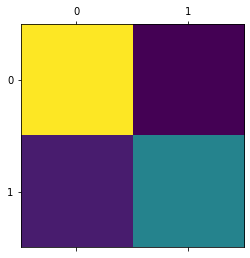

In [54]:
from sklearn.metrics import confusion_matrix

cmf = confusion_matrix(y_train, y_preds)
plt.matshow(cmf)

In [55]:
cmf

array([[491,  58],
       [ 91, 251]])

## Changing and using baseline data to see model performance

In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,1


In [59]:
X_train_unchanged = train_data.drop(['Survived', "PassengerId", 'Name', 'Ticket', 'Sex', 'Cabin', "Embarked"], axis=1)
X_train_unchanged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   Child   891 non-null    bool   
 6   Gender  891 non-null    int64  
dtypes: bool(1), float64(2), int64(4)
memory usage: 42.8 KB


In [60]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [61]:
train_data.groupby('Cabin')['Survived'].value_counts() # to check if any relation in cabin and survivors

Cabin  Survived
A10    0           1
A14    0           1
A16    1           1
A19    0           1
A20    1           1
                  ..
F38    0           1
F4     1           2
G6     0           2
       1           2
T      0           1
Name: Survived, Length: 163, dtype: int64

In [62]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
test_data['Gender'] = test_data['Sex'].apply(lambda x: 1 if x=='male' else 0)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [69]:
X_test_unchanged = test_data.drop(["PassengerId", 'Name', 'Ticket', 'Sex', 'Cabin', "Embarked"], axis=1)
y_train = train_data['Survived']

In [70]:
X_train_unchanged.shape, y_train.shape, X_test_unchanged.shape

((891, 7), (891,), (418, 6))

In [71]:
svc_unaltereddata = SVC()
svc_unaltereddata.fit(X_train_unchanged, y_train)

SVC()

In [73]:
y_preds_unch = svc_unaltereddata.predict(X_train_unchanged)
f1_score(y_train, y_preds)

0.771121351766513

So we now know that our model performs better with manipulated data than with the default data.